# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet



In [3]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplot
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Prob 1: my approach is to lay down real data distribution with normal distribution in one graph. 

In [5]:
mean, std = df['temperature'].mean(), df['temperature'].std()

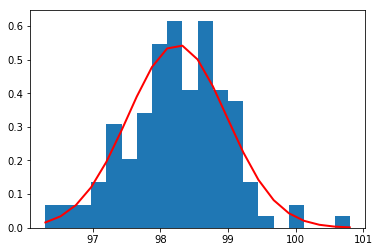

In [6]:
count, bins, ignored = pyplot.hist(df['temperature'], 20, normed=True)
pyplot.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *np.exp( - (bins - mean)**2 / (2 * std**2) ),linewidth=2, color='r')

By comparing histogram of temperature data distribution, and normal distribution, temperature distribution is close to normal distribution.

Prob 2: sample size is 130, medium sized sample. The observations are independent.

In [7]:
df.shape

(130, 3)

Prob 3: Because I don't know whether the temperature is dependent on sex, I will use one-sample test first. Because I don't know the population statistics, I use t statistics.

In [8]:
mean

98.24923076923078

If assume temperature is normal distribution with mean 98.6. The sample mean distribution for 130 samples is normal distribution with standard deviation is (std in sample)/sqrt(sample size). Caculate how many sigma is the sample mean away from the mean assumed in hypothesis. Based on the caculation below, the experimental result is t=5.45 sigma away from mean. The hypothesis that temperature is normal distribution with mean 98.6 therefore is rejected.

In [9]:
t=(98.6-mean)/(std/np.sqrt(130))
t

5.4548232923640789

Then I will use two-sample test,separating man and women.

In [10]:
meanF=df[df['gender']=='F']['temperature'].mean()
stdF=df[df['gender']=='F']['temperature'].std()
countF=df[df['gender']=='F']['temperature'].count()
t=(98.6-meanF)/(stdF/np.sqrt(countF))
t

2.2354980796786501

In [11]:
meanM=df[df['gender']=='M']['temperature'].mean()
stdM=df[df['gender']=='M']['temperature'].std()
countM=df[df['gender']=='M']['temperature'].count()
t=(98.6-meanM)/(stdM/np.sqrt(countM))
t

5.7157574493183638

The numbers of sigma is bigger or smaller than the one-sample case, basically the differece comes from the female and male mean are different.

Prob 4: In normal distribution, we are 95% confident that value will be within 1.96*sigma of mean

In [12]:
# confidence interval:
a=(mean-1.96*std,mean+1.96*std)
a

(96.81219177947445, 99.68626975898711)

In [13]:
# margin of error:
std/np.sqrt(130)

0.06430441683789101

Prob 5: Null hyperthesis: man and woman temperature mean are the same. 

use t test because the temperature is continous value.

In [14]:
#observe this difference between temperatures of man and woman.
df[df['gender']=='F']['temperature'].mean()-df[df['gender']=='M']['temperature'].mean()

0.289230769230727

In [15]:
df[df['gender']=='F']['temperature'].count()

65

In [16]:
df[df['gender']=='M']['temperature'].count()

65

In [20]:
from scipy import stats
p=stats.ttest_ind(df[df['gender']=='F']['temperature'], df[df['gender']=='M']['temperature']).pvalue
p

0.023931883122395609

If using 0.05 threshold for p value, we can reject the null hypothesis. The difference between temperatures of man and woman are significant.